## Receiver Operating Characteristic (ROC) Curve
Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. Most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve.

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
column_names = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data',
                 names = column_names)

In [3]:
# Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the 
# .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series 
# respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.

# build predictor and target df
X, y = df.drop('diabetes', axis=1).values, df['diabetes'].values

In [4]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [8]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
# y_pred = logreg.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'Logistic Regression ROC Curve')

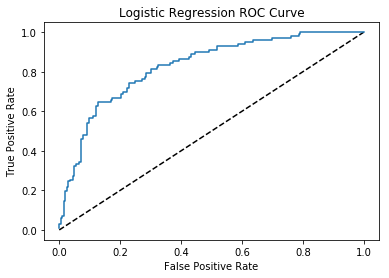

In [10]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr, label='Logistic Regression')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC Curve')